# First insight inot the data

The dataset was obtained from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/45/heart+disease).  
It contains **real clinical data**, anonymized to protect patient privacy, collected from four locations:  
- Cleveland (USA)  
- Hungarian Institute of Cardiology (Hungary)  
- University Hospital, Zurich (Switzerland)  
- Veterans Affairs Medical Center, Long Beach (USA)  

The complete dataset originally included **76 attributes**, but most studies — and this project — focus on a subset of **14 clinically relevant features** (e.g., age, sex, resting blood pressure, serum cholesterol, maximum heart rate, exercise-induced angina, etc.).

The dataset was first introduced in the following publication:  
*Detrano, R. et al., "International application of a new probability algorithm for the diagnosis of coronary artery disease,"* **American Journal of Cardiology**, 64(5):304–310, 1989.

In total, the data represent patient records with a binary target variable indicating the presence or absence of coronary heart disease.

**Let’s take a closer look at the data!**

### First step - imports, environment setup and loading the data.

In [79]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns
import math

from ucimlrepo import fetch_ucirepo 

from scipy.stats import pearsonr, pointbiserialr
import pingouin as pg

In [77]:
%cd C:\Users\piecz\PycharmProjects\warsztaty_data_science\heart_disease_database
!pip install pingouin

C:\Users\piecz\PycharmProjects\warsztaty_data_science\heart_disease_database
  Obtaining dependency information for pingouin from https://files.pythonhosted.org/packages/eb/56/6d3607f3a78aee1de8e5466f5171722c8e344266a12dc44ccb73d024b3b3/pingouin-0.5.5-py3-none-any.whl.metadata
  Obtaining dependency information for pandas-flavor from https://files.pythonhosted.org/packages/5d/e6/71ed4d95676098159b533c4a4c424cf453fec9614edaff1a0633fe228eef/pandas_flavor-0.7.0-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>=1.2 from https://files.pythonhosted.org/packages/15/fa/c61a787e35f05f17fc10523f567677ec4eeee5f95aa4798dbbbcd9625617/scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/df/4c/2feda3a9f0e17444a84ba5398ada6a4d2e1b8f832760048f04e2b8ea0c41/statsmodels-0.14.5-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for tabulate from https://files.pyth


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: C:\Users\piecz\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [8]:
import importlib
import functions.base_tools as base_tools
importlib.reload(base_tools)

from functions.base_tools import *

=== System Information ===
Python version : 3.12.1
Platform       : Windows 11
Machine        : AMD64
Processor      : Intel64 Family 6 Model 154 Stepping 4, GenuineIntel
CPU cores      : 10 (physical), 12 (logical)
Total RAM      : 7.69 GB
Available RAM  : 0.79 GB
Python path    : C:\Users\piecz\AppData\Local\Programs\Python\Python312\python.exe
Current working directory: C:\Users\piecz\PycharmProjects\warsztaty_data_science\heart_disease_database


In [33]:
# loading data from UCIML Repository
heart_disease = fetch_ucirepo(id=45) 

# data (as pandas dataframes) 
data = heart_disease.data.original 
display(data.sample(5))

# metadata 
for feature, value in heart_disease.metadata.items():
    print(feature,": ", value)
# variable information 
display(heart_disease.variables) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
197,45,0,4,138,236,0,2,152,1,0.2,2,0.0,3.0,0
199,59,1,1,160,273,0,2,125,0,0.0,1,0.0,3.0,1
121,63,0,4,150,407,0,2,154,0,4.0,2,3.0,7.0,4
70,65,0,3,155,269,0,0,148,0,0.8,1,0.0,3.0,0
89,51,0,3,130,256,0,2,149,0,0.5,1,0.0,3.0,0


uci_id :  45
name :  Heart Disease
repository_url :  https://archive.ics.uci.edu/dataset/45/heart+disease
data_url :  https://archive.ics.uci.edu/static/public/45/data.csv
abstract :  4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach
area :  Health and Medicine
tasks :  ['Classification']
characteristics :  ['Multivariate']
num_instances :  303
num_features :  13
feature_types :  ['Categorical', 'Integer', 'Real']
demographics :  ['Age', 'Sex']
target_col :  ['num']
index_col :  None
has_missing_values :  yes
missing_values_symbol :  NaN
year_of_dataset_creation :  1989
last_updated :  Fri Nov 03 2023
dataset_doi :  10.24432/C52P4X
creators :  ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano']
intro_paper :  {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sandhu, K. G

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


### What describes dataset?
Let's look at available columns.

| Column     | Description |
|------------|-------------|
| age        | Age of the patient in years. |
| sex        | Patient's sex (1 = male, 0 = female). |
| cp         | Chest pain type (4 categories: typical, atypical, non-anginal, asymptomatic). |
| trestbps   | Resting blood pressure in mm Hg on admission. |
| chol       | Serum cholesterol level in mg/dl. |
| fbs        | Fasting blood sugar > 120 mg/dl (1 = true, 0 = false). |
| restecg    | Resting electrocardiographic results (3 categories). |
| thalach    | Maximum heart rate achieved during exercise test. |
| exang      | Exercise-induced angina (1 = yes, 0 = no). |
| oldpeak    | ST depression induced by exercise relative to rest. |
| slope      | Slope of the peak exercise ST segment (3 categories). |
| ca         | Number of major vessels (0–3) colored by fluoroscopy. |
| thal       | Thalassemia test result (3 = normal, 6 = fixed defect, 7 = reversible defect). |
| target     | Diagnosis of heart disease (1 = disease present, 0 = no disease). |

### Step two - univariate analises

Let's explore basic stats and visualizations for each column.


In [34]:
rename_dict = {
    'age': 'age',
    'sex': 'sex',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol',
    'fbs': 'fasting_bs',
    'restecg': 'rest_ecg',
    'thalach': 'max_heart_rate',
    'exang': 'exercise_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'vessels_count',
    'thal': 'thalassemia',
    'num': 'heart_disease'
}
data.rename(columns= rename_dict, inplace=True)

In [35]:
continuous_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
continuous_cols = [rename_dict[col] for col in continuous_cols]
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_cols = [rename_dict[col] for col in categorical_cols]
target = [rename_dict['num']]

In [36]:
print("Baseline statistics for continuous columns")
display(data[continuous_cols].describe())

Baseline statistics for continuous columns


,age,resting_bp,cholesterol,max_heart_rate,st_depression
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


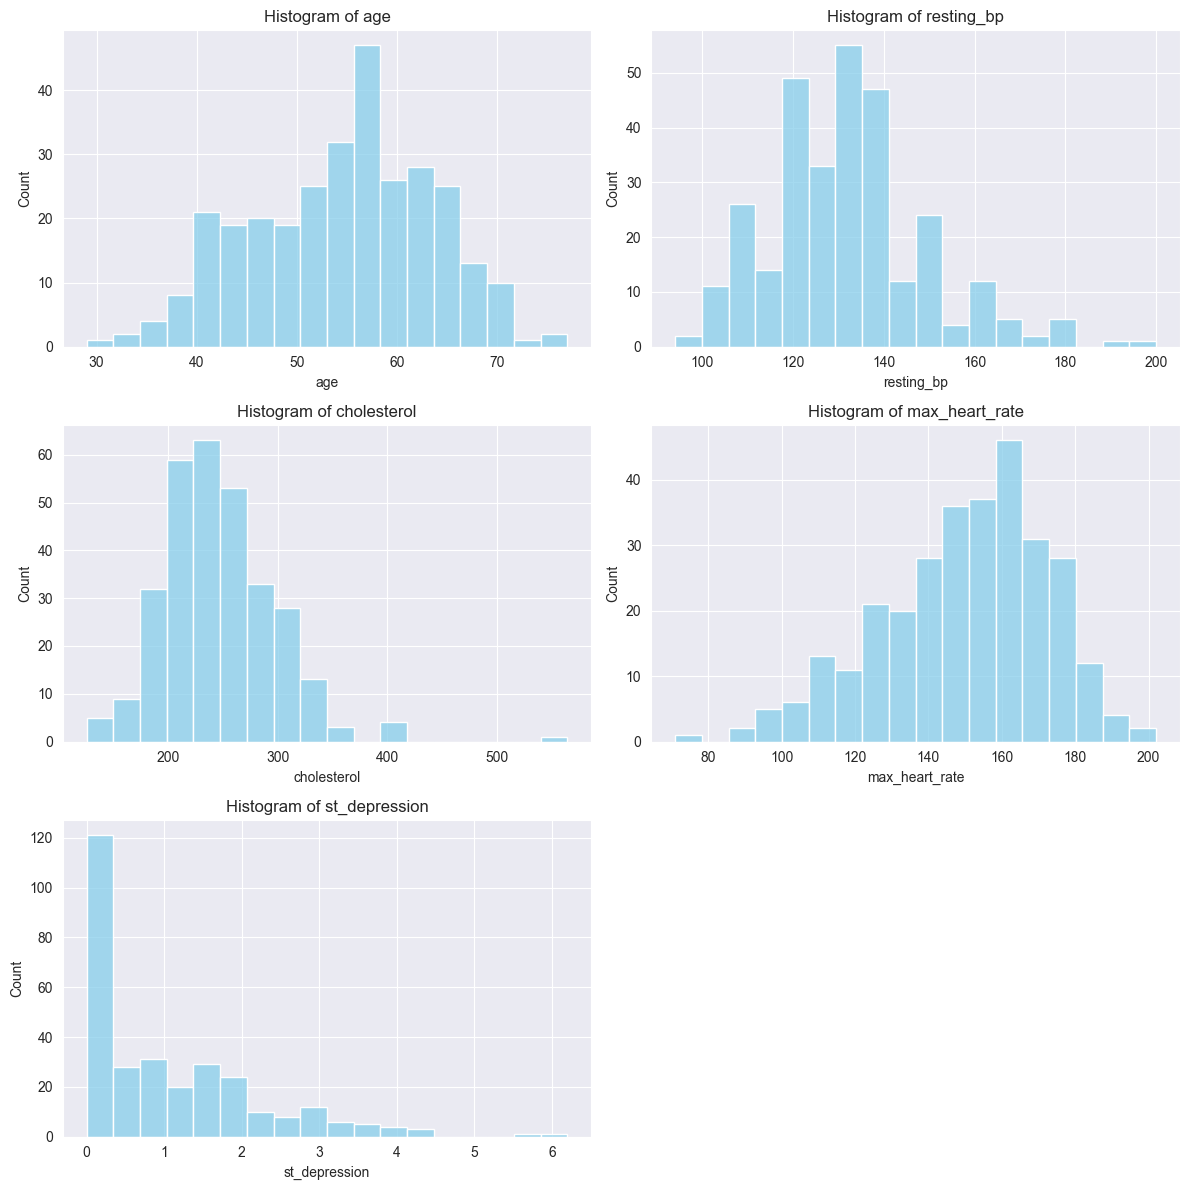

In [44]:
n_cols = 2
n_rows = (len(continuous_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.histplot(data=data, x=col, kde=False, ax=axes[i], color='skyblue', bins=18)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

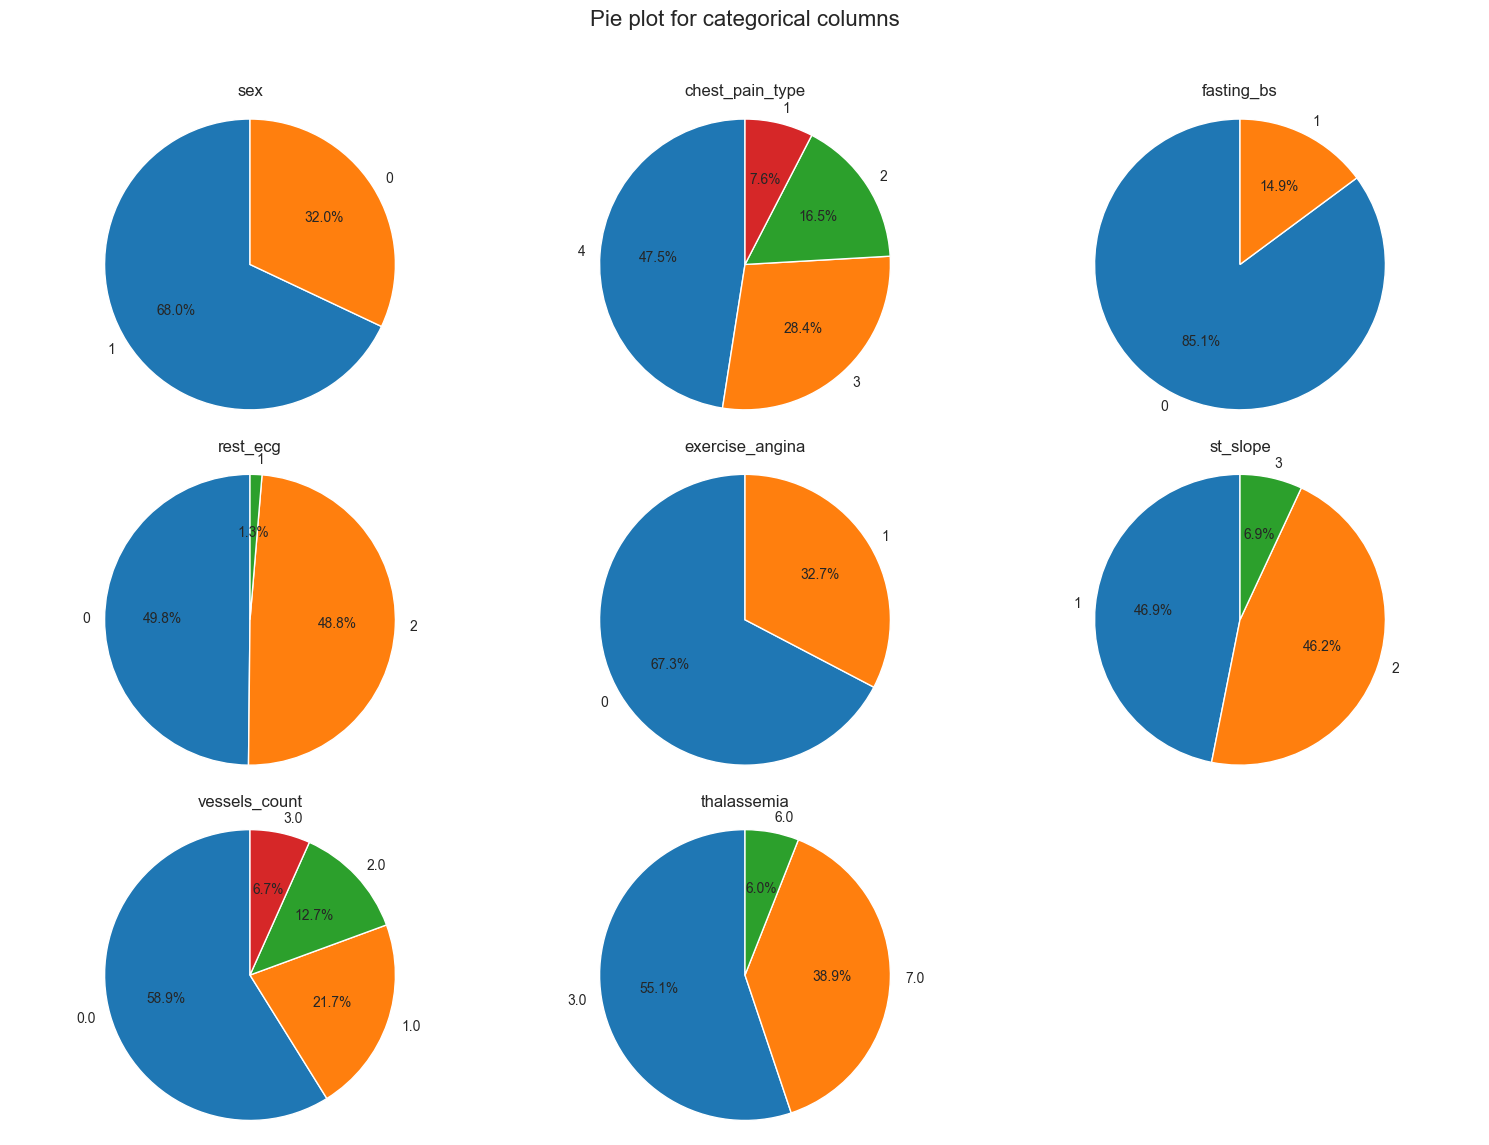

In [39]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

fig.suptitle('Pie plot for categorical columns', fontsize=16, y=0.95)

for i, col in enumerate(categorical_cols):
    counts = data[col].value_counts()
    labels = counts.index.astype(str)
    sizes = counts.values

    axes[i].pie(sizes, labels=labels, startangle=90, autopct='%1.1f%%')
    axes[i].set_title(col)
    axes[i].axis('equal')

fig.delaxes(axes[-1])
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

### Bivariate analises
It's time to look at relations between the data. We will start from computing correlations. To avoid inflation of correlation coefficients when binary variables are involved, correlations are calculated as follows:
- *continuous – continuous variables:* Pearson correlation coefficient
- *continuous – binary variables:* point-biserial correlation
- *binary – binary variables:* tetrachoric correlation proxy (approximated by Phi coefficient)

Categorical variables with an inherent linear order are treated as continuous for the purpose of correlation analysis.

In [55]:
all_cols = data.columns.tolist()

binary = [col for col in all_cols if data[col].dropna().nunique() == 2]
continuous = [col for col in all_cols if col not in binary]
print("Binary variables: ",binary)
print("Continuous variables (to be check): ",continuous)

Binary variables:  ['sex', 'fasting_bs', 'exercise_angina']
Continuous variables (to be check):  ['age', 'chest_pain_type', 'resting_bp', 'cholesterol', 'rest_ecg', 'max_heart_rate', 'st_depression', 'st_slope', 'vessels_count', 'thalassemia', 'heart_disease']


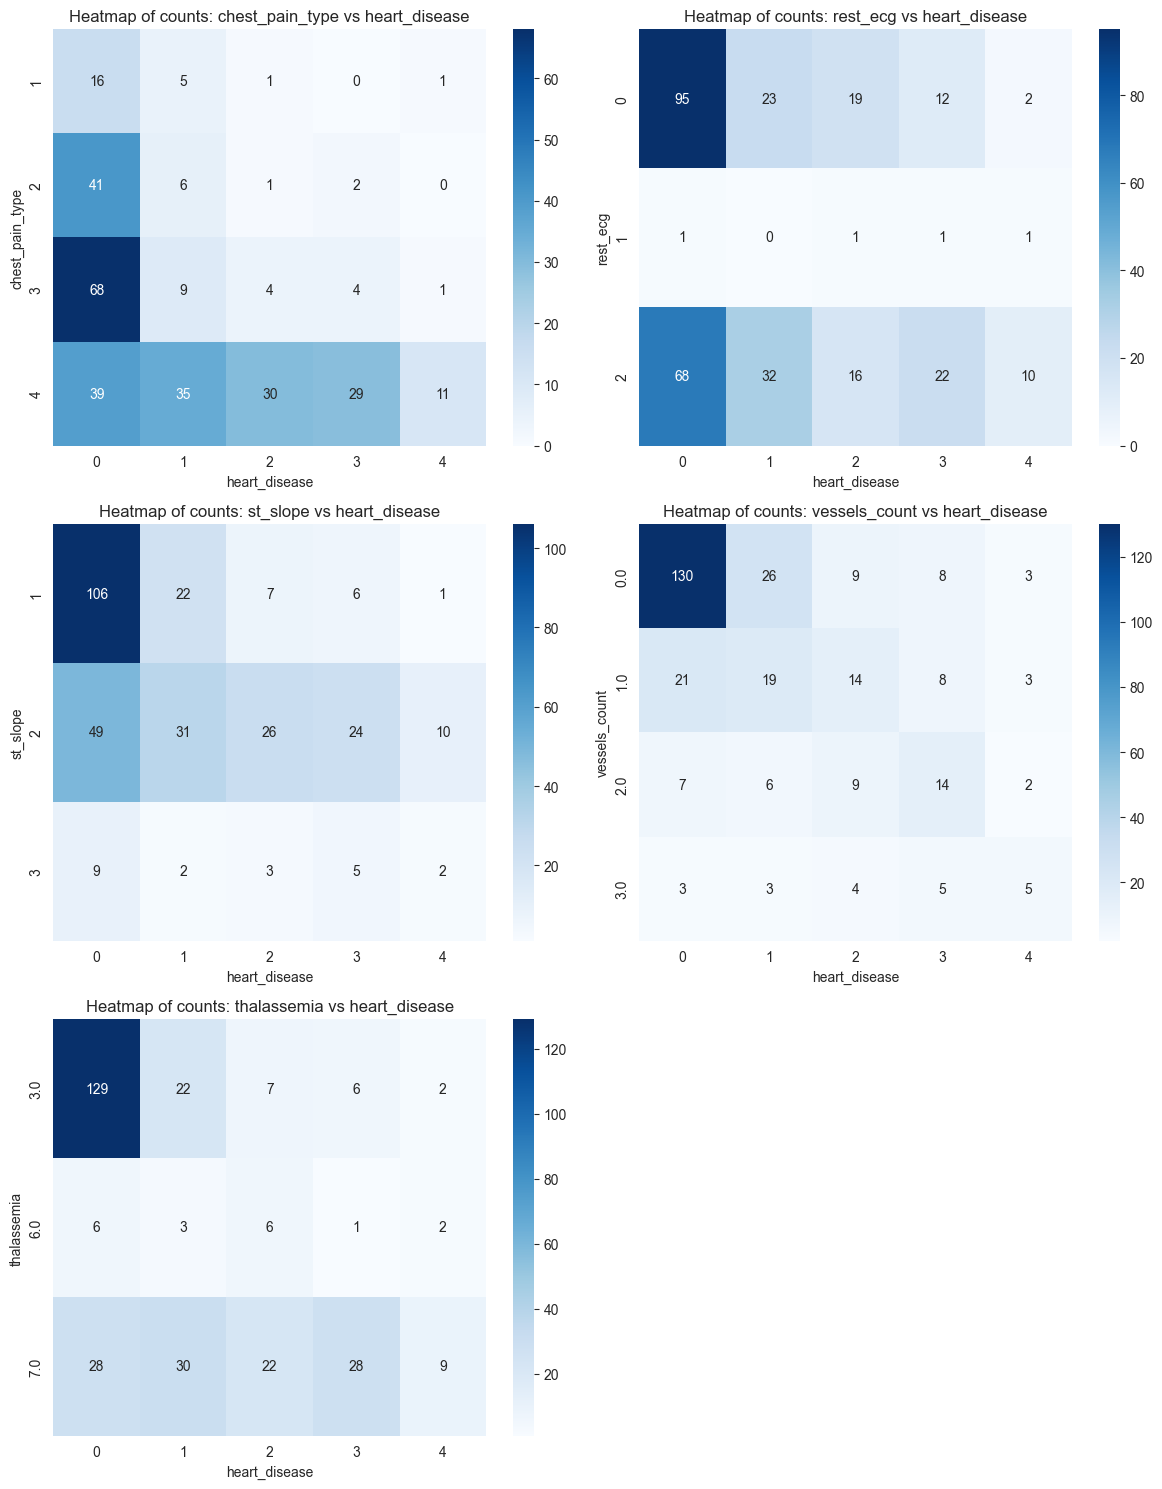

In [58]:
#Checking if we can assume linear order in categorical variables or OHE is needed

target = 'heart_disease'

cols_to_plot = [col for col in continuous if col in categorical_cols]

n = len(cols_to_plot)
ncols = 2
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 5*nrows))
axes = axes.flatten()

for i, cont_col in enumerate(cols_to_plot):
    cross_tab_counts = pd.crosstab(data[cont_col], data[target])
    sns.heatmap(cross_tab_counts, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Heatmap of counts: {cont_col} vs {target}')
    axes[i].set_ylabel(cont_col)
    axes[i].set_xlabel(target)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

As we can see, there is a problem with linearity of `rest_ecg` and `thalassemia`. It can be a sugestion to try One Hot Encoding approach.

In [71]:
col_to_ohe = ['restecg','thal']
col_to_ohe = [rename_dict[col] for col in col_to_ohe]

ohe_values = {k: data[k].dropna().unique().tolist() for k in col_to_ohe}
print(ohe_values)

for col in col_to_ohe:
    for i in ohe_values[col]:
        data[f'{col}_{int(i)}'] = data[col].map(lambda x: 1 if x == i else (0 if pd.notna(x) else np.nan))
display(data.sample(5))

{'rest_ecg': [2, 0, 1], 'thalassemia': [6.0, 3.0, 7.0]}


,age,sex,chest_pain_type,resting_bp,cholesterol,fasting_bs,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,vessels_count,thalassemia,heart_disease,rest_ecg_2,rest_ecg_0,rest_ecg_1,thalassemia_6,thalassemia_3,thalassemia_7
102,57,0,4,128,303,0,2,159,0,0.0,1,1.0,3.0,0,1,0,0,0.0,1.0,0.0
60,51,0,4,130,305,0,0,142,1,1.2,2,0.0,7.0,2,0,1,0,0.0,0.0,1.0
273,71,0,4,112,149,0,0,125,0,1.6,2,0.0,3.0,0,0,1,0,0.0,1.0,0.0
202,57,1,3,150,126,1,0,173,0,0.2,1,1.0,7.0,0,0,1,0,0.0,0.0,1.0
285,58,1,4,114,318,0,1,140,0,4.4,3,3.0,6.0,4,0,0,1,1.0,0.0,0.0


Actual computation of correlations.

In [80]:
binary = [col for col in data.columns if data[col].dropna().nunique() == 2]
continuous = [col for col in numeric_cols if col not in binary]

print("Binary variables: ", binary)
print("Continuous variables (to be checked): ", continuous)

# 1. Pearson correlations between continuous-continuous
pearson_corr = data[continuous].corr()
print("Pearson correlation (continuous-continuous):")
print(pearson_corr)

# 2. Point-biserial correlations continuous-binary
print("\nPoint-Biserial correlations (continuous-binary):")
for cont_col in continuous:
    for bin_col in binary:
        subset = data[[bin_col, cont_col]].dropna()
        if len(subset) > 1:  # żeby uniknąć błędów przy mało danych
            corr, pval = pointbiserialr(subset[bin_col], subset[cont_col])
            print(f"{bin_col} vs {cont_col}: r = {corr:.3f}, p = {pval:.3g}")
        else:
            print(f"{bin_col} vs {cont_col}: Not enough data")

# 3. Phi correlations (binary-binary) - tetrachoric
print("\nPhi correlations (binary-binary):")
binary_data = data[binary].dropna()


tetra_matrix = pd.DataFrame(np.nan, index=binary, columns=binary)

for i, col1 in enumerate(binary):
    for j, col2 in enumerate(binary):
        if i <= j:
            corr = pg.tetrachoric(binary_data[col1], binary_data[col2])
            val = corr['r'][0]
            tetra_matrix.loc[col1, col2] = val
            tetra_matrix.loc[col2, col1] = val

print(tetra_matrix)

Binary variables:  ['sex', 'fasting_bs', 'exercise_angina', 'rest_ecg_2', 'rest_ecg_0', 'rest_ecg_1', 'thalassemia_6', 'thalassemia_3', 'thalassemia_7']
Continuous variables (to be checked):  ['age', 'chest_pain_type', 'resting_bp', 'cholesterol', 'rest_ecg', 'max_heart_rate', 'st_depression', 'st_slope', 'vessels_count', 'thalassemia', 'heart_disease']
Pearson correlation (continuous-continuous):
                      age  chest_pain_type  resting_bp  cholesterol  rest_ecg  \
age              1.000000         0.104139    0.284946     0.208950  0.148868   
chest_pain_type  0.104139         1.000000   -0.036077     0.072319  0.067505   
resting_bp       0.284946        -0.036077    1.000000     0.130120  0.146560   
cholesterol      0.208950         0.072319    0.130120     1.000000  0.171043   
rest_ecg         0.148868         0.067505    0.146560     0.171043  1.000000   
max_heart_rate  -0.393806        -0.334422   -0.045351    -0.003432 -0.083389   
st_depression    0.203805       

AttributeError: module 'pingouin' has no attribute 'tetrachoric'

In [76]:
print(data[binary].dtypes)
print(data[binary].head())

sex                  int64
fasting_bs           int64
exercise_angina      int64
rest_ecg_2           int64
rest_ecg_0           int64
rest_ecg_1           int64
thalassemia_6      float64
thalassemia_3      float64
thalassemia_7      float64
dtype: object
   sex  fasting_bs  exercise_angina  rest_ecg_2  rest_ecg_0  rest_ecg_1  \
0    1           1                0           1           0           0   
1    1           0                1           1           0           0   
2    1           0                1           1           0           0   
3    1           0                0           0           1           0   
4    0           0                0           1           0           0   

   thalassemia_6  thalassemia_3  thalassemia_7  
0            1.0            0.0            0.0  
1            0.0            1.0            0.0  
2            0.0            0.0            1.0  
3            0.0            1.0            0.0  
4            0.0            1.0            0.0 